<a href="https://colab.research.google.com/github/LIMDANBI/SKTFLYAI/blob/main/ML/%E1%84%90%E1%85%A6%E1%86%AB%E1%84%89%E1%85%A5%E1%84%91%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A9%E1%84%8B%E1%85%AE2_%E1%84%83%E1%85%A1%E1%84%8C%E1%85%AE%E1%86%BC%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 다중 선형회귀 (Multiple Linear Regression)
---

* 독립 변수가 2개 이상인 데이터의 선형 회귀문제

### 문제 1. 라이브러리

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# !pip install --upgrade tensorflow

In [2]:
print(tf.__version__)

2.8.2


### 문제 2. 데이터 만들기

In [3]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

### 문제 3. 경사하강법

가설: $$  \hat{y}=W_1x_1 + W_2x_2 +b  $$

#### 변수 초기화

In [4]:
W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

lr = tf.constant(0.001)
epochs = 1000
costs = []          

In [5]:
# 가중치가 배열 형태 
print(W1.numpy(), W2.numpy(), b.numpy())

[8.736742] [-9.065426] [-3.538394]


#### 경사하강법

In [6]:
for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W1*x1_data + W2*x2_data + b
    cost = tf.reduce_mean(tf.square(hypothesis-y_data))
    costs.append(cost.numpy())

  W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
  W1.assign_sub(lr*W1_grad)
  W2.assign_sub(lr*W2_grad)
  b.assign_sub(lr*b_grad)

  if i % 100 == 0:
    print("{:5} | {:.6f} | {:.4f} | {:.4f} | {:.6}".format(i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))

    0 | 823.696411 | 8.6412 | -8.9764 | -3.53501
  100 | 117.392822 | 3.4850 | -2.9356 | -2.93321
  200 | 19.897480 | 2.1112 | -0.3288 | -2.41041
  300 | 3.968471 | 1.7010 | 0.7734 | -2.10572
  400 | 1.189731 | 1.5587 | 1.2301 | -1.93399
  500 | 0.673292 | 1.4991 | 1.4129 | -1.82792
  600 | 0.554872 | 1.4679 | 1.4804 | -1.75232
  700 | 0.508166 | 1.4474 | 1.4996 | -1.69086
  800 | 0.475635 | 1.4313 | 1.4987 | -1.63632
  900 | 0.447043 | 1.4173 | 1.4896 | -1.58558
 1000 | 0.420499 | 1.4043 | 1.4774 | -1.53726


#### 비용 변환 시각화

학습이 진행되면서 Cost가 어떻게 변화하는지 그래프로 표시해보자

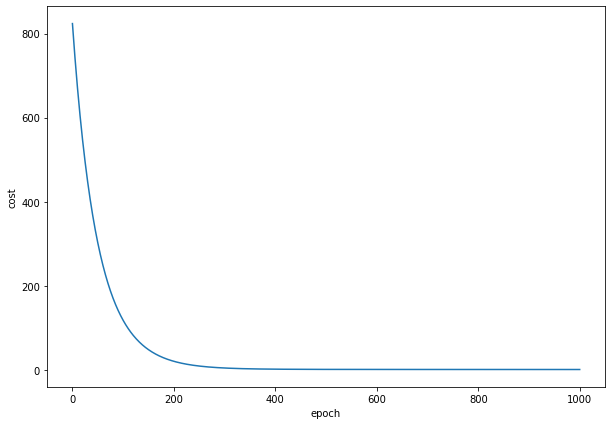

In [7]:
plt.figure(figsize=(10,7))
plt.plot(costs)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

# 보스턴 주택 가격 예측

CRIM: 지역별 범죄 발생률 <br>
ZN: 25,000평방피트를 초과하는 거주 지역의 비율 <br>
NDUS: 비상업 지역 넓이 비율 <br>
CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0) <br>
NOX: 일산화질소 농도 <br>
RM: 거주할 수 있는 방 개수 <br>
AGE: 1940년 이전에 건축된 소유 주택의 비율 <br>
DIS: 5개 주요 고용센터까지의 가중 거리 <br>
RAD: 고속도로 접근 용이도 <br>
TAX: 10,000달러당 재산세율 <br>
PTRATIO: 지역의 교사와 학생 수 비율 <br>
B: 지역의 흑인 거주 비율 <br>
LSTAT: 하위 계층의 비율 <br>
PRICE: 주택 가격

In [10]:
from sklearn.datasets import load_boston 
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 데이터 만들기

* 독립 변수가 3개인 다중 회귀문제 

In [12]:
X1 = df['RM'] # 방 개수
X2 = df['LSTAT'] # 하위 계층 비율
X3 = df['PTRATIO'] # 지역의 교사와 학생 수 비율
y = df['PRICE']

In [23]:
W1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
W3 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

lr = tf.constant(0.001)
epochs = 2000
costs = []          

### 경사하강법

In [24]:
for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W1*X1 + W2*X2 + W3*X3 + b
    cost = tf.reduce_mean(tf.square(hypothesis-y))
    costs.append(cost.numpy())

  W1_grad, W2_grad, W3_grad, b_grad = tape.gradient(cost, [W1, W2, W3, b])
  W1.assign_sub(lr*W1_grad)
  W2.assign_sub(lr*W2_grad)
  W3.assign_sub(lr*W3_grad)
  b.assign_sub(lr*b_grad)

  if i % 100 == 0:
    print("{:5} | {:.6f} | {:.4f} | {:.4f} | {:.4f} | {:.6}".format(i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], W3.numpy()[0], b.numpy()[0]))

    0 | 1467.070190 | -3.3089 | 2.9109 | -0.1153 | 0.107175
  100 | 77.979836 | -0.4686 | -1.0658 | 2.0556 | 0.409281
  200 | 62.080544 | 0.6917 | -0.9705 | 1.5947 | 0.521524
  300 | 51.261414 | 1.6471 | -0.8874 | 1.2116 | 0.616086
  400 | 43.898312 | 2.4351 | -0.8189 | 0.8955 | 0.696236
  500 | 38.887093 | 3.0849 | -0.7624 | 0.6347 | 0.764497
  600 | 35.476379 | 3.6208 | -0.7158 | 0.4195 | 0.822947
  700 | 33.154846 | 4.0626 | -0.6774 | 0.2419 | 0.873304
  800 | 31.574524 | 4.4269 | -0.6457 | 0.0954 | 0.916981
  900 | 30.498608 | 4.7272 | -0.6196 | -0.0255 | 0.955148
 1000 | 29.765940 | 4.9748 | -0.5980 | -0.1253 | 0.988767
 1100 | 29.266863 | 5.1788 | -0.5803 | -0.2076 | 1.01863
 1200 | 28.926756 | 5.3469 | -0.5656 | -0.2756 | 1.0454
 1300 | 28.694830 | 5.4854 | -0.5535 | -0.3317 | 1.06961
 1400 | 28.536522 | 5.5994 | -0.5436 | -0.3780 | 1.09171
 1500 | 28.428310 | 5.6933 | -0.5354 | -0.4163 | 1.11207
 1600 | 28.354191 | 5.7705 | -0.5286 | -0.4479 | 1.13099
 1700 | 28.303278 | 5.8340

#### 결과 시각화 

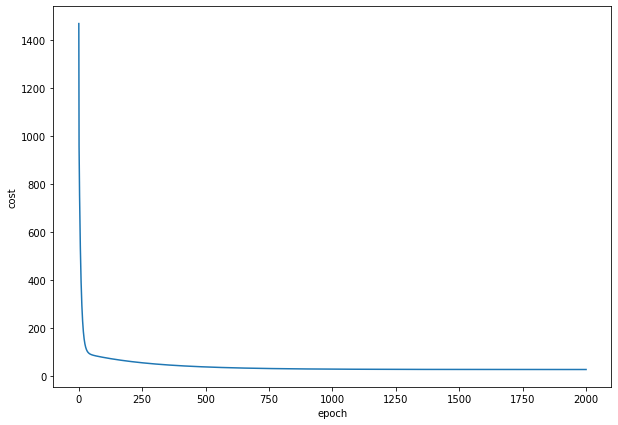

In [25]:
plt.figure(figsize=(10,7))
plt.plot(costs)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()